In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d

# Data Preprocessing

In [2]:
data = []
paths = []
y = []
for r, d, f in os.walk(r"D:\Downloads\cats-faces-64x64-for-generative-models\cats"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

#for each file add normal resolution and small resolution to arrays
for path in paths:
    img = Image.open(path)
    #x = img.resize((64,64))
    placeholder = np.array(img)
    #placeholder = placeholder[...,:3]
    data.append(placeholder)

In [3]:
data = np.array(data)/255

In [4]:
len(data)

15747

In [5]:
data = data.reshape(len(data), 12288)

In [6]:
pca = PCA(n_components=512).fit(data)
pca_3d = pca.transform(data)

In [7]:
sum(pca.explained_variance_ratio_)

0.953013988611667

In [8]:
inverse = np.array(pca.inverse_transform(pca_3d)).reshape(len(data), 64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


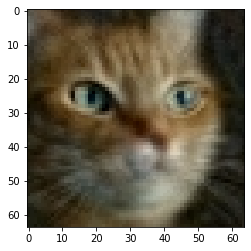

In [12]:
imshow(inverse[250])

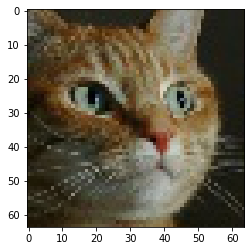

In [13]:
imshow(data[250].reshape(64,64,3))

In [14]:
np.save("pca_dataset",pca_3d)

In [15]:
data_points = []
data_points.append(pca_3d[617])
data_points.append(pca_3d[82])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Vee\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow wi

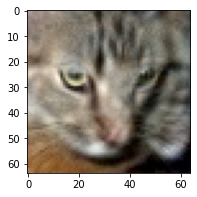

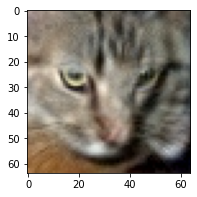

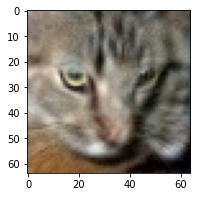

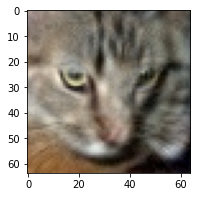

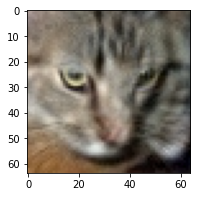

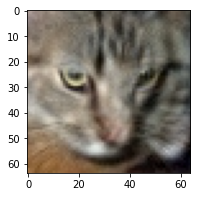

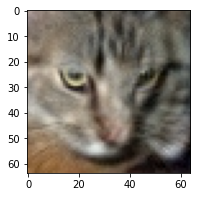

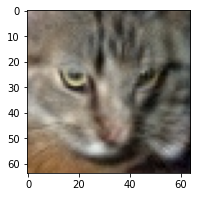

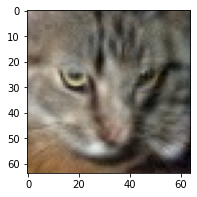

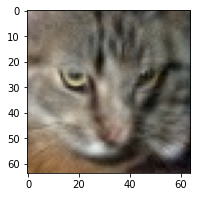

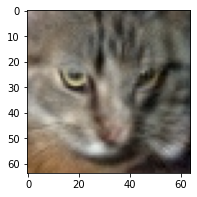

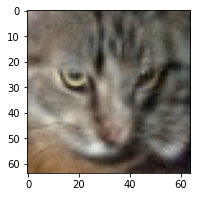

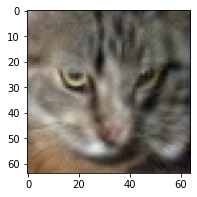

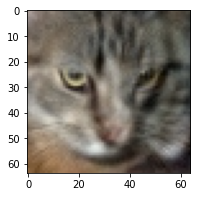

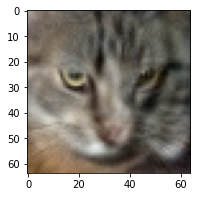

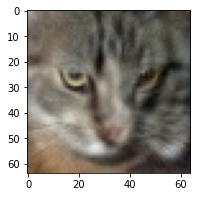

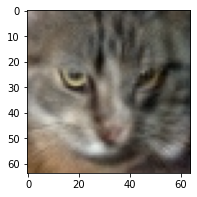

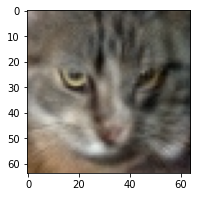

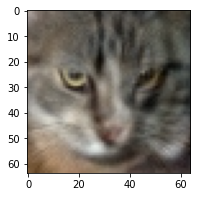

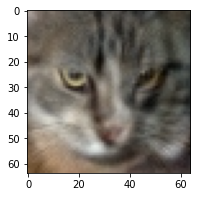

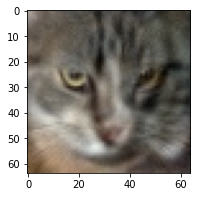

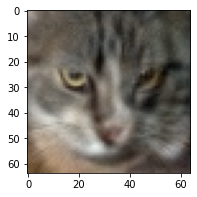

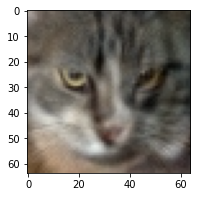

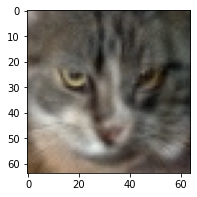

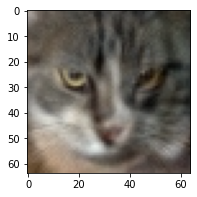

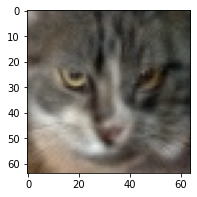

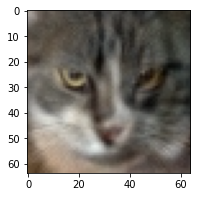

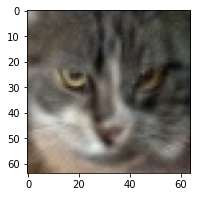

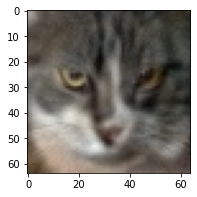

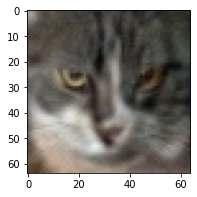

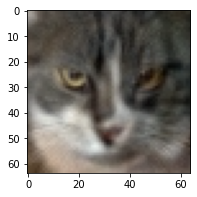

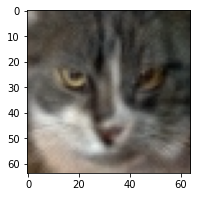

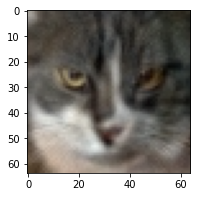

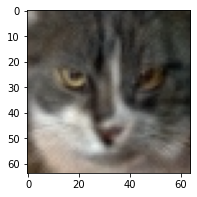

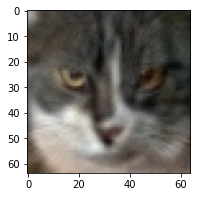

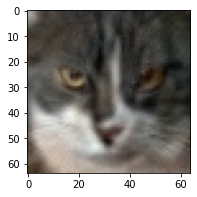

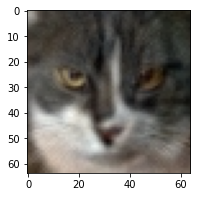

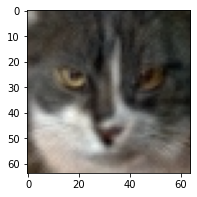

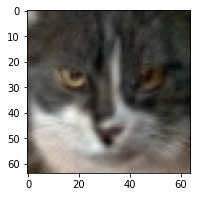

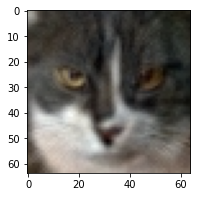

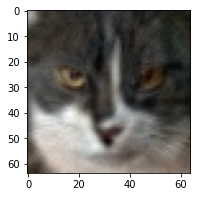

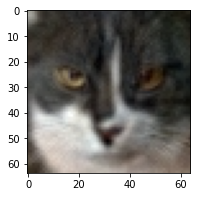

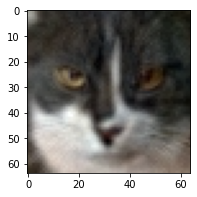

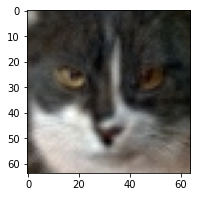

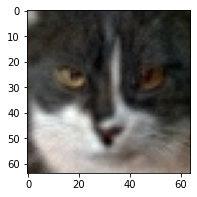

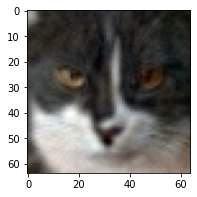

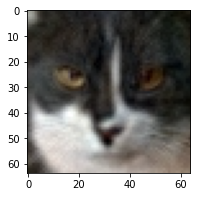

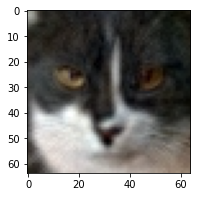

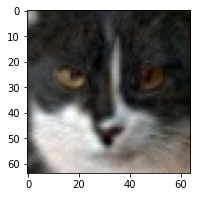

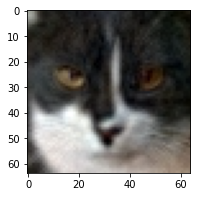

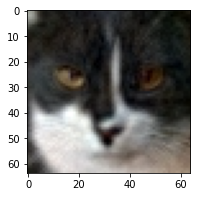

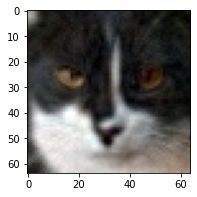

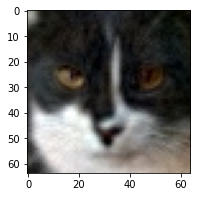

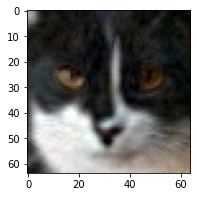

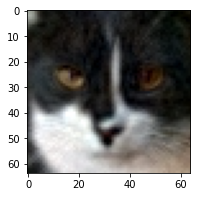

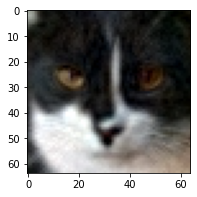

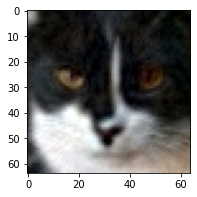

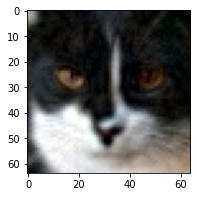

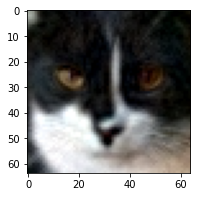

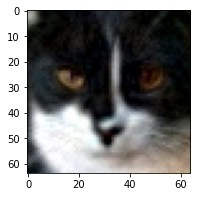

In [16]:
#fit a line between point1 and point2
points = 60
count = 0
for x in range(len(data_points)-1):
    line = interp1d([1, points], np.vstack([data_points[x], data_points[x+1]]), axis=0)
    for i in range(points):
        result = pca.inverse_transform(line(i+1).reshape(512))
        result = np.array(result)
        result = result.reshape(64,64,3)
        result = result * 255
        result = result.astype(int)
        fig=plt.figure(figsize=(3, 3))
        plt.imshow(result)
        fig.add_subplot(1, 1, 1)
        fig.savefig(r"C:\Users\Vee\Desktop\python\GAN\walk\image_%d.png" % count)
        count = count + 1